## Project- Cross Sell Strategy Formulation Using Data Science

### About:-
In this project, the data collected and given by the bank pretains to those who were already offered the product. Based on the data gathered, we can analyze and find insights as to who among the customers belonging to the bank are more likely to accept the insurance if it is offered to them.

Using these insights can give the bank's marketing department some breathing room and increase the efficency of their operations.

#### Cross sell:-
Definition- Cross-selling is a sales and marketing technique where a company encourages its customers to purchase additional or complementary products or services to the ones they have already purchased or are interested in. It involves offering related or upgraded products that enhance or supplement the customer's original purchase.

The concept of cross-selling is based on the idea that customers who are already interested in one product or service may also be interested in other offerings that complement or enhance their initial purchase. By suggesting additional products or services, companies aim to increase their revenue per customer and strengthen customer loyalty.

#### Data Science:-
Data Science is a broad subject, its an interdisciplinary field that combines statistical, mathematical, programming, problem-solving and data-management tools.

### Objective-

#### Primary:-
The primary objective of this project is to train a machine learning model that can predict who among the many customers affliated with the bank are more likely to accept the insurance service if it was offered to them.

#### Secondary:-
The secondary objective of this project is to analyze the data itself and extract insights from the data by creating a dashboard and creating a report for the bank.

### Process:-
The project will be completed in different phases:-
1. Data Processing- The process of data processing itself will be completed in the following ways:-\
(a) Data pre-processing - A group of operations that will basically convert our raw data into a format that is more understandable and hence useful for further processing.\
(b)- Class Labeling - Involves labeling the data point to the correct data type or arranging data by category. (Already Done)\
(c)- Dealing with missing values.\
(d)- Stratified Random Sampling- Since the number of rows/records is around 16,000, it will take very long time to do the EDA process, hence to reduce that time, a sample of the data will be taken from the population and later hypothesis testing will be done on the population to make sure the insights extracted from the sample is consistent with the population.
2. EDA(Exploratory data analyses)
3. Creating a report and presentation to convey the insights found to the client.
4. Training the appropriate model on the training data.
5. Testing the trained model on the testing data.

In [1]:
# Importing the packages/libraries for the data processing
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data Processing Phase

### (a) - Data Pre Processing

In [2]:
# Reading the data from the excel file and refrencing that data which in form of a dataframe by a variable named 'data'
data = pd.read_excel('Worksheet.xls')

In [3]:
data.shape

(16383, 59)

## Insight 1 -
There are 16,383 rows and 59 columns present in the worksheet of the excel file. This amount of rows and columns is definetly not small. I will have to remove some coulmns that will not prove to helpful in neither the data analyses phase of the data analytics phase.
The dataframe contains one individual column - 'Ref' which won't be much helpful in case of analysis and 58 other variable columns among which most will have to be dropped since not every column contains releative information required for an effective analysis.\
Hence Dimensionality reduction will have to happen among the very first steps of data processing.

In [4]:
data.ndim

2

## Insight 2-
The dimension of the dataframe is 2. Hence there are only rows and columns present in this traditional dataset.

In [5]:
data.head()

,Ref,Credit_Score,Final_Grade,Term,Net_Advance,APR,Loan_Type,Mosaic,Mosaic_Class,Time_at_Address,...,CIFAS_detected,Time_since_most_recent_outstandi,Insurance_Description,PPI,code,prdt_desc,category,PPI_SINGLE,PPI_JOINT,PPI_LCI
0,1,918,A,36,3000.0,14.4,UnSecured,46,8,132,...,N,16,NaN,0,NaN,NaN,NaN,0,0,0
1,3,903,A,120,21000.0,7.9,secured,16,3,288,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
2,4,1060,X,78,7200.0,7.9,secured,17,3,276,...,N,50,Joint,1,719.0,LASCI JOINT,Joint,0,1,0
3,6,839,B,60,8000.0,16.9,UnSecured,47,8,48,...,N,99,Life & Critical Illn,1,748.0,LIFE & CRITICAL ILLNESS,LCI,0,0,1
4,7,1057,X,60,7650.0,7.4,UnSecured,55,10,156,...,N,99,Single,1,718.0,LASCI,Single,1,0,0


In [6]:
m="Ref"
list(np.linspace(start=data[m].min(),stop=data[m].max(),num=5))

[1.0, 10518.75, 21036.5, 31554.25, 42072.0]

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16383 entries, 0 to 16382
Data columns (total 59 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Ref                               16383 non-null  int64  
 1   Credit_Score                      16383 non-null  int64  
 2   Final_Grade                       16383 non-null  object 
 3   Term                              16383 non-null  int64  
 4   Net_Advance                       16383 non-null  float64
 5   APR                               16383 non-null  float64
 6   Loan_Type                         16383 non-null  object 
 7   Mosaic                            16383 non-null  int64  
 8   Mosaic_Class                      16383 non-null  int64  
 9   Time_at_Address                   16383 non-null  int64  
 10  Residential_Status                16383 non-null  object 
 11  Telephone_Indicator               16383 non-null  object 
 12  Numb

## Insight 3-
The data.info method data types of every column and the count of non null values. If the non null values present in every column are equal to the number of rows then there will be no null values. Unfortunatley there are four columns that have less non null values as compared to the number of rows.\
Column names-\
Insurance_Description - 9461 non null values,\
code - 9405 non null values,\
prdt_desc - 9345 non null values,\
category - 9461 non null values.

### Data Discovery Phase:-
The data contains the following field:

*    Ref (int64) - Every Table has two types of columns/fields- Individual and variable. Ref plays the part of individiual here. It is uniqually identifying each value/row of this data set. In sort, 'Ref' is the primary key for this particular dataset.
*    Credit_Score (int64) - A credit score is an indicator of a person's creditworthiness, or their ability to repay debt. It is usually expressed as a number based on the person's repayment history and credit files.
*    Final_Grade (object) - A grade has been assigned to each customer based on multiple parameters. This shall be treated as categorical variable for analysis.
*    Term (int64) - Tenure of the loan which can be used to classify the loan as short-term loan(1-12months), intermediate loan(13-60months) and long-term loan(>60months).
*    Net_Advance (float64) - Total Short-term borrowings (in rupees) including all the sources.
*    APR (float64) - Annual percentage rate (APR) refers to the yearly interest generated by a sum that's charged to borrowers or paid to investors.
*    Loan_Type (object) 
*    Mosaic (int64)  
*    Mosaic_Class (int64)  
*    Time_at_Address (int64)  
*   Residential_Status (object) 
*   Telephone_Indicator (object) 
*   Number_of_Dependants (int64) 
*   Marital_Status (object) 
*   Gender (object) 
*   Time_in_Employment (int64)  
*   Employment_Status (object) 
*   Full_Part_Time_Empl_Ind (object) 
*   Perm_Temp_Empl_Ind (object) 
*   Income_Range (int64)  
*   Current_Account (object) 
*   ACCESS_Card (object) 
*   VISA_Card (object) 
*   American_Express (object) 
*   Diners_Card (object) 
*   Cheque_Guarantee (object) 
*   Other_Credit_Store_Card (object) 
*   Time_with_Bank (int64)  
*   Value_of_Property (int64)  
*   Outstanding_Mortgage_Bal (int64)  
*   Total_Outstanding_Balances (int64)  
*   Bureau_Data___Monthly_Other_Co_R (int64)  
*   Worst_History_CT (int64)  
*   Payment_Method (object) 
*   Age (int64)  
*   Total_outstanding_balance__mortg (int64)  
*   Total___Public_Info___CCJ____ban (int64)  
*   Total_value__CAIS_8_9s (int64)  
*   Worst_status_L6m (int64)  
*   Worst_CUrrent_Status (int64)  
*   __of_status_3_s_L6m (int64)  
*   Searches___Total___L6m (int64)  
*   Years_on_ER_for_SP (int64)  
*   Bankruptcy_Detected__SP_  (object) 
*   Total___outstanding_CCJ_s (int64)  
*   Total_outstanding_balance___excl (int64)  
*   Total___of_accounts (int64)  
*   CIFAS_detected (object) 
*   Time_since_most_recent_outstandi (int64)  
*   Insurance_Description (object) 
*   PPI (int64)  
*   code (float64)
*   prdt_desc (object) 
*   category (object) 
*   PPI_SINGLE (int64)  
*   PPI_JOINT (int64)  
*   PPI_LCI (int64) 

In [8]:
print(f"Number of Unique values present in the 'Ref' coulumn is {data['Ref'].nunique()} out of {len(data.index)} rows")

Number of Unique values present in the 'Ref' coulumn is 16383 out of 16383 rows


As seen in the above cell, not any value was repeated since number of unique values present in the 'Ref' column is equal to the number of rows present in the data set. Hence 'Ref' is an individual for this dataset.\
Individual- Individual is the sort of object around which the data is based. They aren't always people, they can be cases, things, studies, all different kind of objects.

In [9]:
data.describe()

,Ref,Credit_Score,Term,Net_Advance,APR,Mosaic,Mosaic_Class,Time_at_Address,Number_of_Dependants,Time_in_Employment,...,Years_on_ER_for_SP,Total___outstanding_CCJ_s,Total_outstanding_balance___excl,Total___of_accounts,Time_since_most_recent_outstandi,PPI,code,PPI_SINGLE,PPI_JOINT,PPI_LCI
count,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,...,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,16383.000000,9405.000000,16383.000000,16383.000000,16383.000000
mean,21168.695294,882.061832,59.142892,7364.007758,18.754587,29.419703,5.352683,120.488128,0.808460,103.096075,...,6.572667,0.157602,137.793628,5.984679,91.697308,0.577489,743.303243,0.382348,0.074773,0.120369
std,12142.797527,93.149605,26.689123,6673.343595,9.662504,16.718957,5.130278,109.192185,1.118947,91.541972,...,7.449055,0.540908,145.935978,2.669217,22.092297,0.493974,24.283753,0.485976,0.263032,0.325402
min,1.000000,352.000000,6.000000,500.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,517.000000,0.000000,0.000000,0.000000
25%,10699.000000,818.000000,48.000000,3000.000000,9.900000,16.000000,3.000000,38.000000,0.000000,38.000000,...,1.000000,0.000000,34.000000,4.000000,99.000000,0.000000,716.000000,0.000000,0.000000,0.000000
50%,21303.000000,882.000000,60.000000,5300.000000,16.900000,25.000000,4.000000,84.000000,0.000000,72.000000,...,4.000000,0.000000,93.000000,6.000000,99.000000,1.000000,756.000000,0.000000,0.000000,0.000000
75%,31689.000000,947.000000,60.000000,9000.000000,24.900000,44.000000,8.000000,180.000000,1.000000,144.000000,...,10.000000,0.000000,194.000000,9.000000,99.000000,1.000000,759.000000,1.000000,0.000000,0.000000
max,42072.000000,1295.000000,300.000000,75000.000000,50.400000,99.000000,99.000000,864.000000,30.000000,600.000000,...,34.000000,9.000000,999.000000,9.000000,99.000000,1.000000,779.000000,1.000000,1.000000,1.000000


### (c) Dealing With Missing Values

In [10]:
data.isnull().sum()

Ref                                    0
Credit_Score                           0
Final_Grade                            0
Term                                   0
Net_Advance                            0
APR                                    0
Loan_Type                              0
Mosaic                                 0
Mosaic_Class                           0
Time_at_Address                        0
Residential_Status                     0
Telephone_Indicator                    0
Number_of_Dependants                   0
Marital_Status                         0
Gender                                 0
Time_in_Employment                     0
Employment_Status                      0
Full_Part_Time_Empl_Ind                0
Perm_Temp_Empl_Ind                     0
Income_Range                           0
Current_Account                        0
ACCESS_Card                            0
VISA_Card                              0
American_Express                       0
Diners_Card     

In [11]:
data.isnull().sum()[data.isnull().sum()>0]

Insurance_Description    6922
code                     6978
prdt_desc                7038
category                 6922
dtype: int64

In [12]:
len(data[data['PPI']==0])

6922

In [13]:
len(data[(data['code'].isnull()) & (data['PPI']==0)])

6922

In [14]:
len(data[(data['prdt_desc'].isnull()) & (data['PPI']==0)])

6922

In [15]:
len(data[(data['Insurance_Description'].isnull()) & (data['PPI']==0)])

6922

In [16]:
len(data[(data['category'].isnull()) & (data['PPI']==0)])

6922

In [17]:
len(data[(data['code'].isnull()) & (data['PPI']==1)])

56

In [18]:
len(data[(data['prdt_desc'].isnull()) & (data['PPI']==1)])

116

In [19]:
data[['Insurance_Description','code','prdt_desc','category','PPI']].head()

,Insurance_Description,code,prdt_desc,category,PPI
0,NaN,NaN,NaN,NaN,0
1,Life & Critical Illn,748.0,LIFE & CRITICAL ILLNESS,LCI,1
2,Joint,719.0,LASCI JOINT,Joint,1
3,Life & Critical Illn,748.0,LIFE & CRITICAL ILLNESS,LCI,1
4,Single,718.0,LASCI,Single,1


All eight columns [Insurance_Description, code, prdt_desc, category, PPI, PPI_SINGLE, PPI_JOINT, PPI_LCI] are interrelated to each other and mainly define one another. They will have no significance however in the analysis phase of the project and neither in the analytics phase either. The only valuable column is PPI which is our target column.

### (d) Stratified Random Sampling

In [20]:
new_data=data.drop(["Insurance_Description","code","prdt_desc","category","PPI_SINGLE", "PPI_JOINT", "PPI_LCI"],axis=1)

In [21]:
sample=new_data.groupby("PPI").apply(lambda x: x.sample(frac=0.1,random_state=101))
sample.shape

(1638, 52)

# EDA and Feature Selection Process
### Finding the relevant Features for the Machine Learning Phase and doing the Exploratory Data Analysis around the Target Variable i.e., PPI.

In [22]:
dimensions=[]
for col in new_data.columns:
    if len(set(new_data[col]))<=15 and 'PPI' not in col:
        dimensions.append(col)
len(dimensions) # Contains Categorical/Qualitative variables


measures = []
for col in new_data.columns:
    if col=="Ref":
        pass
    elif col not in dimensions and 'PPI' not in col:
        measures.append(col)
    # Contains continous and discrete/Quantitative variables


print(f"Number of Dimensions in this banking data - {len(dimensions)}.")
print(f"Number of Measures in this banking data - {len(measures)}.")

Number of Dimensions in this banking data - 30.
Number of Measures in this banking data - 20.


# Univariate Analysis

## Categorical Data/Dimensions

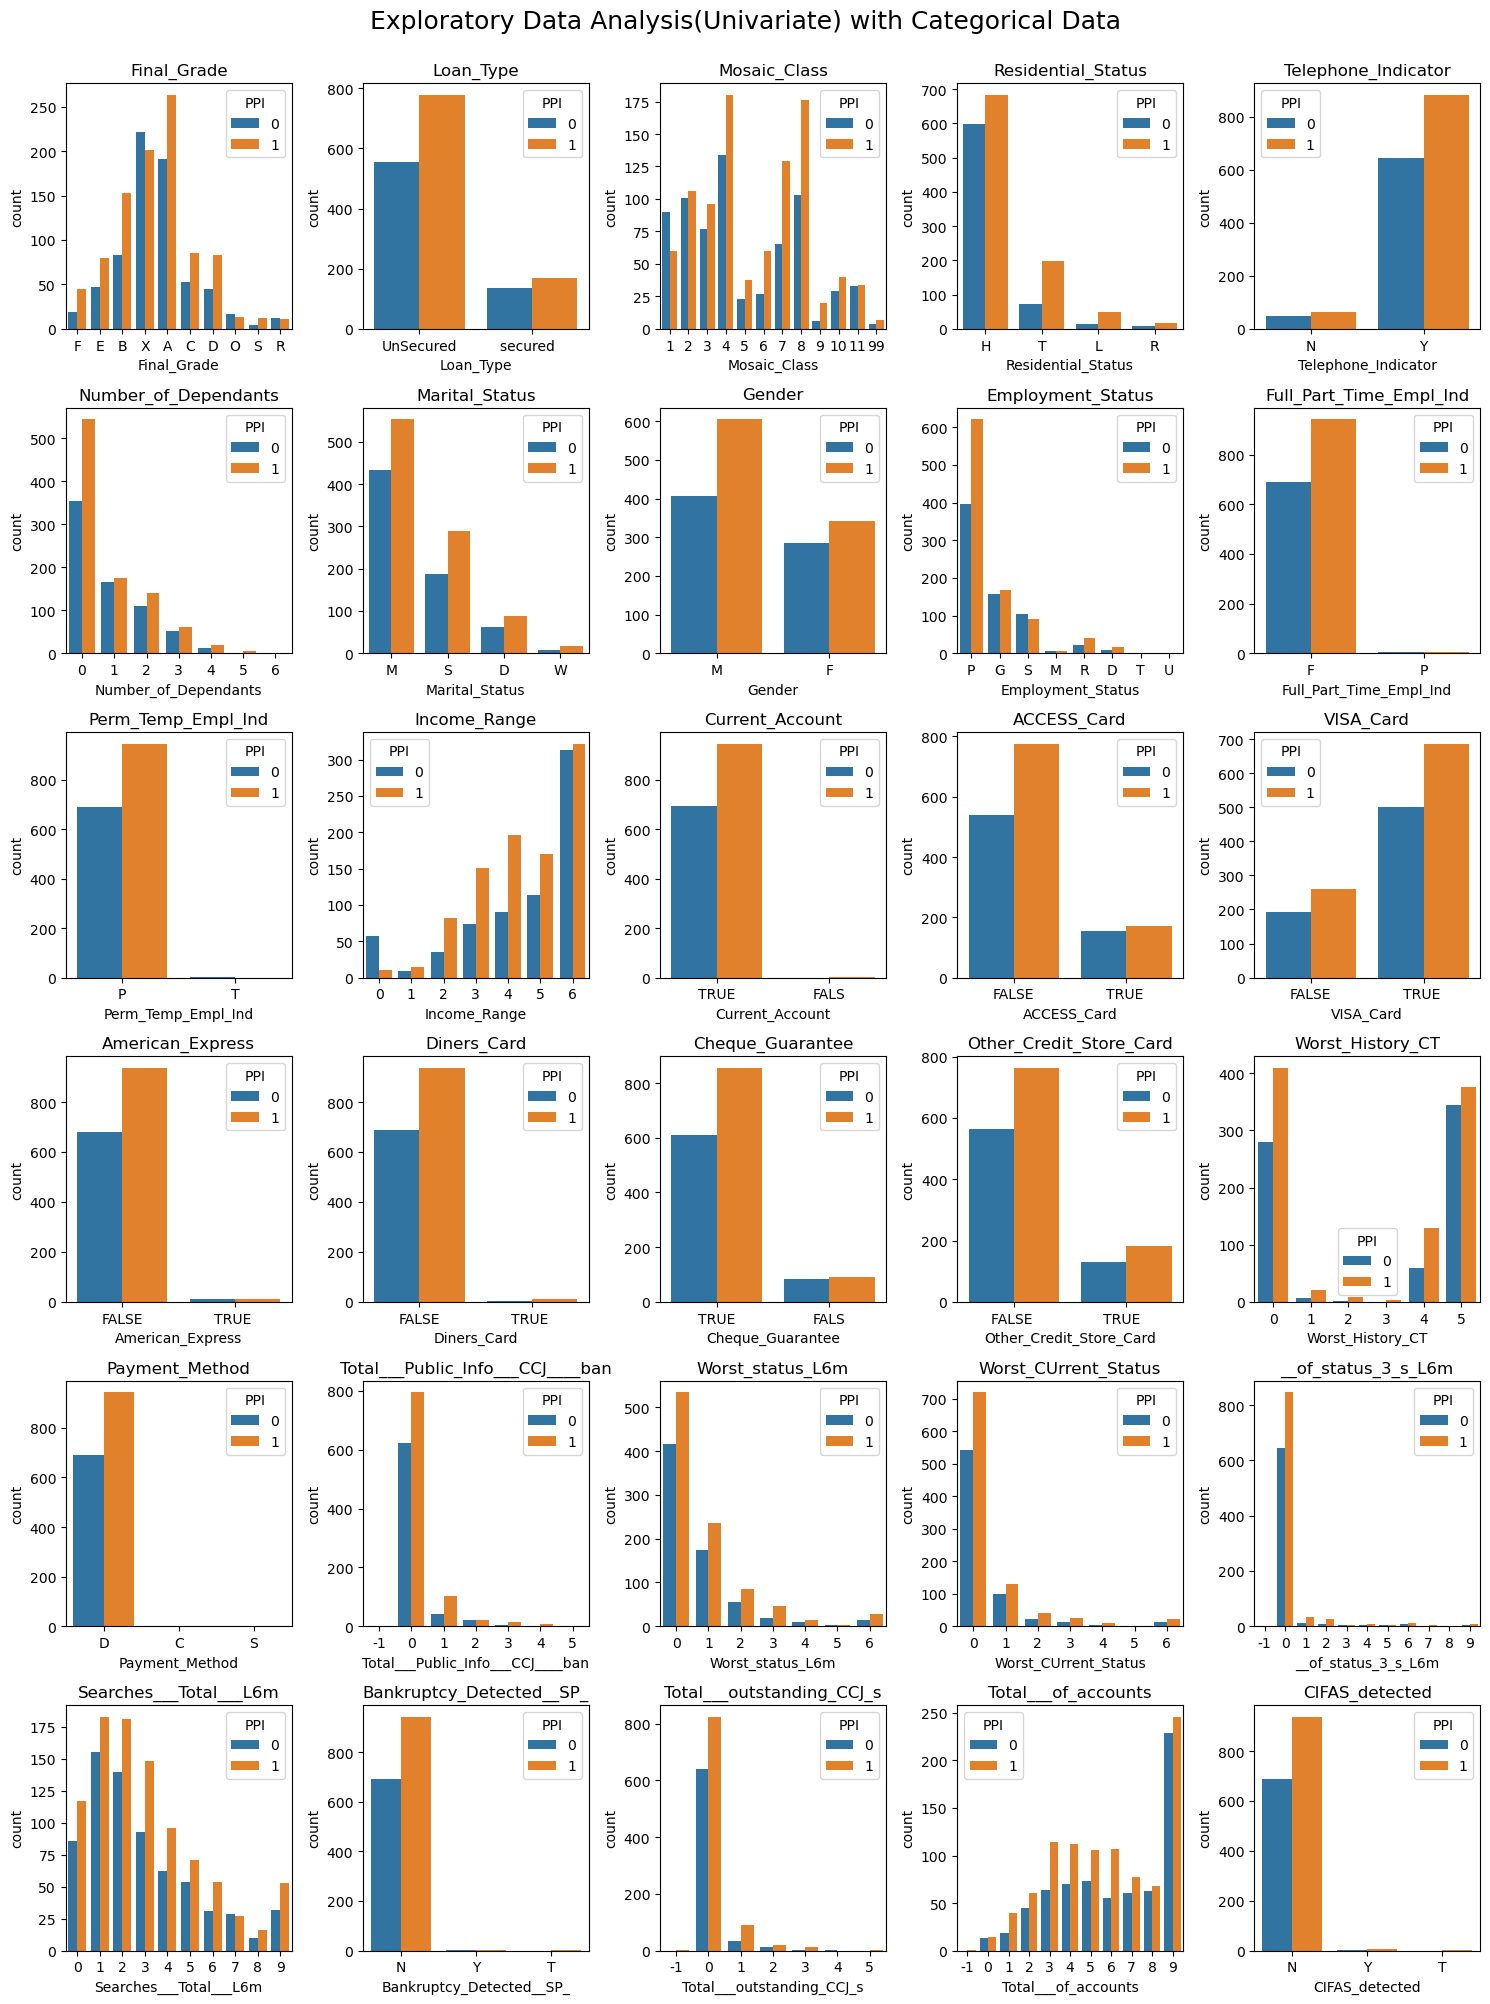

In [23]:
figure, ax = plt.subplots(6, 5, figsize=(15, 20))
figure.suptitle('Exploratory Data Analysis(Univariate) with Categorical Data',x=0.5,y=1,size=18)
k=0
for i in range(6):
    for j in range(5):
        ax[i][j].set_title(dimensions[k])
        sns.countplot(sample,x=dimensions[k],hue="PPI",ax=ax[i][j])
        k+=1
plt.tight_layout()

**Value of association of dimensions(categorical variables) with the target variable(also a categorical/classification variable)**

In [24]:
from scipy.stats.contingency import association
d={}
for feature in dimensions:
    confusion_matrix = pd.crosstab(sample[feature], sample["PPI"])
    d[feature]=association(confusion_matrix, method="cramer")
pd.Series(d)

Final_Grade                         0.150393
Loan_Type                           0.022694
Mosaic_Class                        0.162289
Residential_Status                  0.169485
Telephone_Indicator                 0.001274
Number_of_Dependants                0.089676
Marital_Status                      0.052181
Gender                              0.050781
Employment_Status                   0.118627
Full_Part_Time_Empl_Ind             0.010997
Perm_Temp_Empl_Ind                  0.028898
Income_Range                        0.238288
Current_Account                     0.021139
ACCESS_Card                         0.051390
VISA_Card                           0.004061
American_Express                    0.023381
Diners_Card                         0.025705
Cheque_Guarantee                    0.035844
Other_Credit_Store_Card             0.008843
Worst_History_CT                    0.132502
Payment_Method                      0.036636
Total___Public_Info___CCJ____ban    0.111003
Worst_stat

In [25]:
d={}
for feature in dimensions:
    confusion_matrix = pd.crosstab(data[feature], data["PPI"])
    d[feature]=association(confusion_matrix, method="cramer")
c=pd.Series(d)
c

Final_Grade                         0.117645
Loan_Type                           0.004134
Mosaic_Class                        0.186158
Residential_Status                  0.114383
Telephone_Indicator                 0.003158
Number_of_Dependants                0.066349
Marital_Status                      0.070294
Gender                              0.020921
Employment_Status                   0.086012
Full_Part_Time_Empl_Ind             0.011554
Perm_Temp_Empl_Ind                  0.004371
Income_Range                        0.225730
Current_Account                     0.001342
ACCESS_Card                         0.035054
VISA_Card                           0.009803
American_Express                    0.015381
Diners_Card                         0.018904
Cheque_Guarantee                    0.044938
Other_Credit_Store_Card             0.029989
Worst_History_CT                    0.085043
Payment_Method                      0.024305
Total___Public_Info___CCJ____ban    0.107027
Worst_stat

In [26]:
# Choosing the new dimensions that will be used in the machine learning phase. The threshold will be greater than .10.
new_dimensions=[]
for i in dimensions:
    if c[i]>=0.10:
        new_dimensions.append(i)
new_dimensions

['Final_Grade',
 'Mosaic_Class',
 'Residential_Status',
 'Income_Range',
 'Total___Public_Info___CCJ____ban',
 'Total___outstanding_CCJ_s',
 'Total___of_accounts']

## Continous Data/Measures

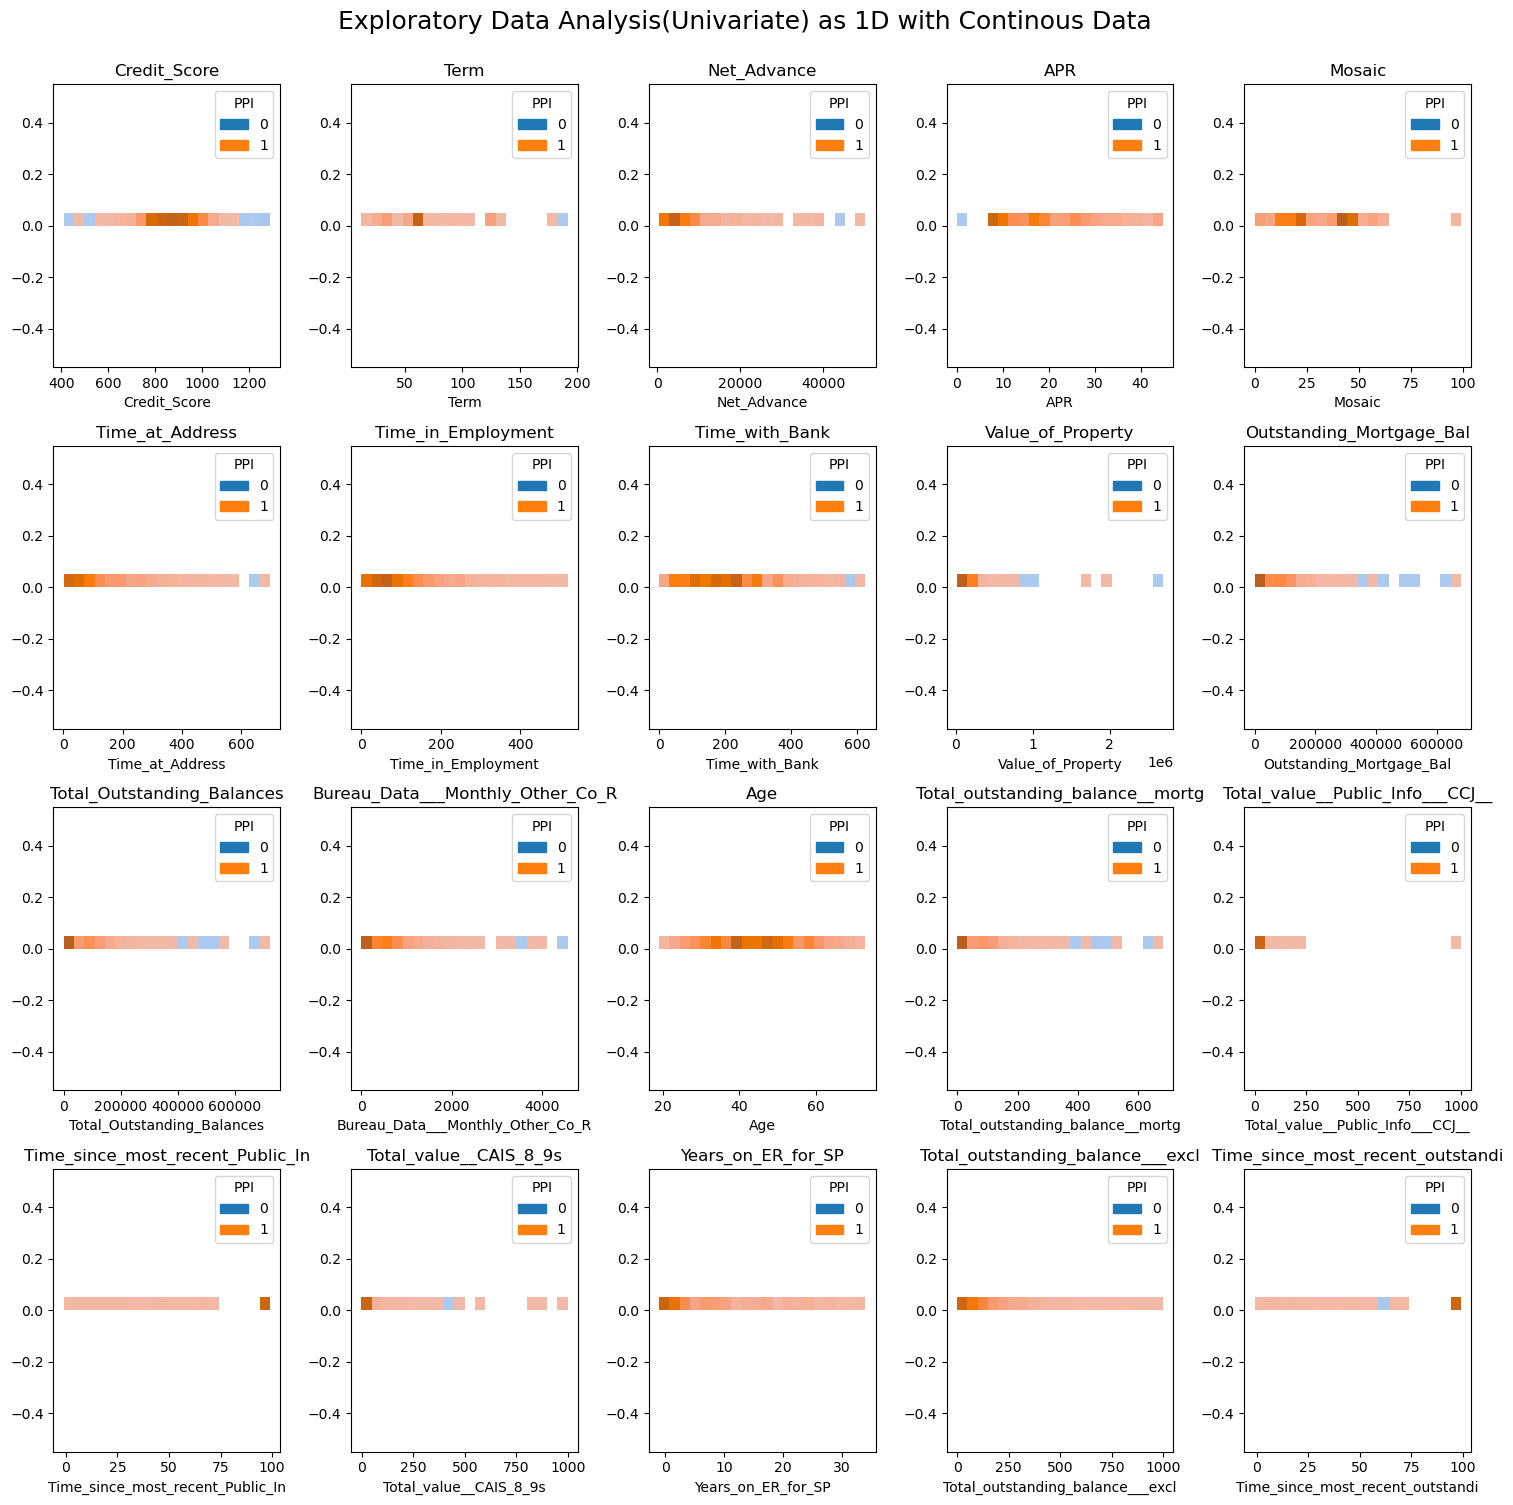

In [27]:
figure, ax = plt.subplots(4, 5, figsize=(15, 15))
figure.suptitle('Exploratory Data Analysis(Univariate) as 1D with Continous Data',x=0.5,y=1,size=18)
k=0
for i in range(4):
    for j in range(5):
        ax[i][j].set_title(measures[k])
        sns.histplot(sample,x=measures[k],y=np.zeros(sample.shape[0]),hue="PPI",kde=True,ax=ax[i][j],bins=20)
        k+=1
plt.tight_layout()

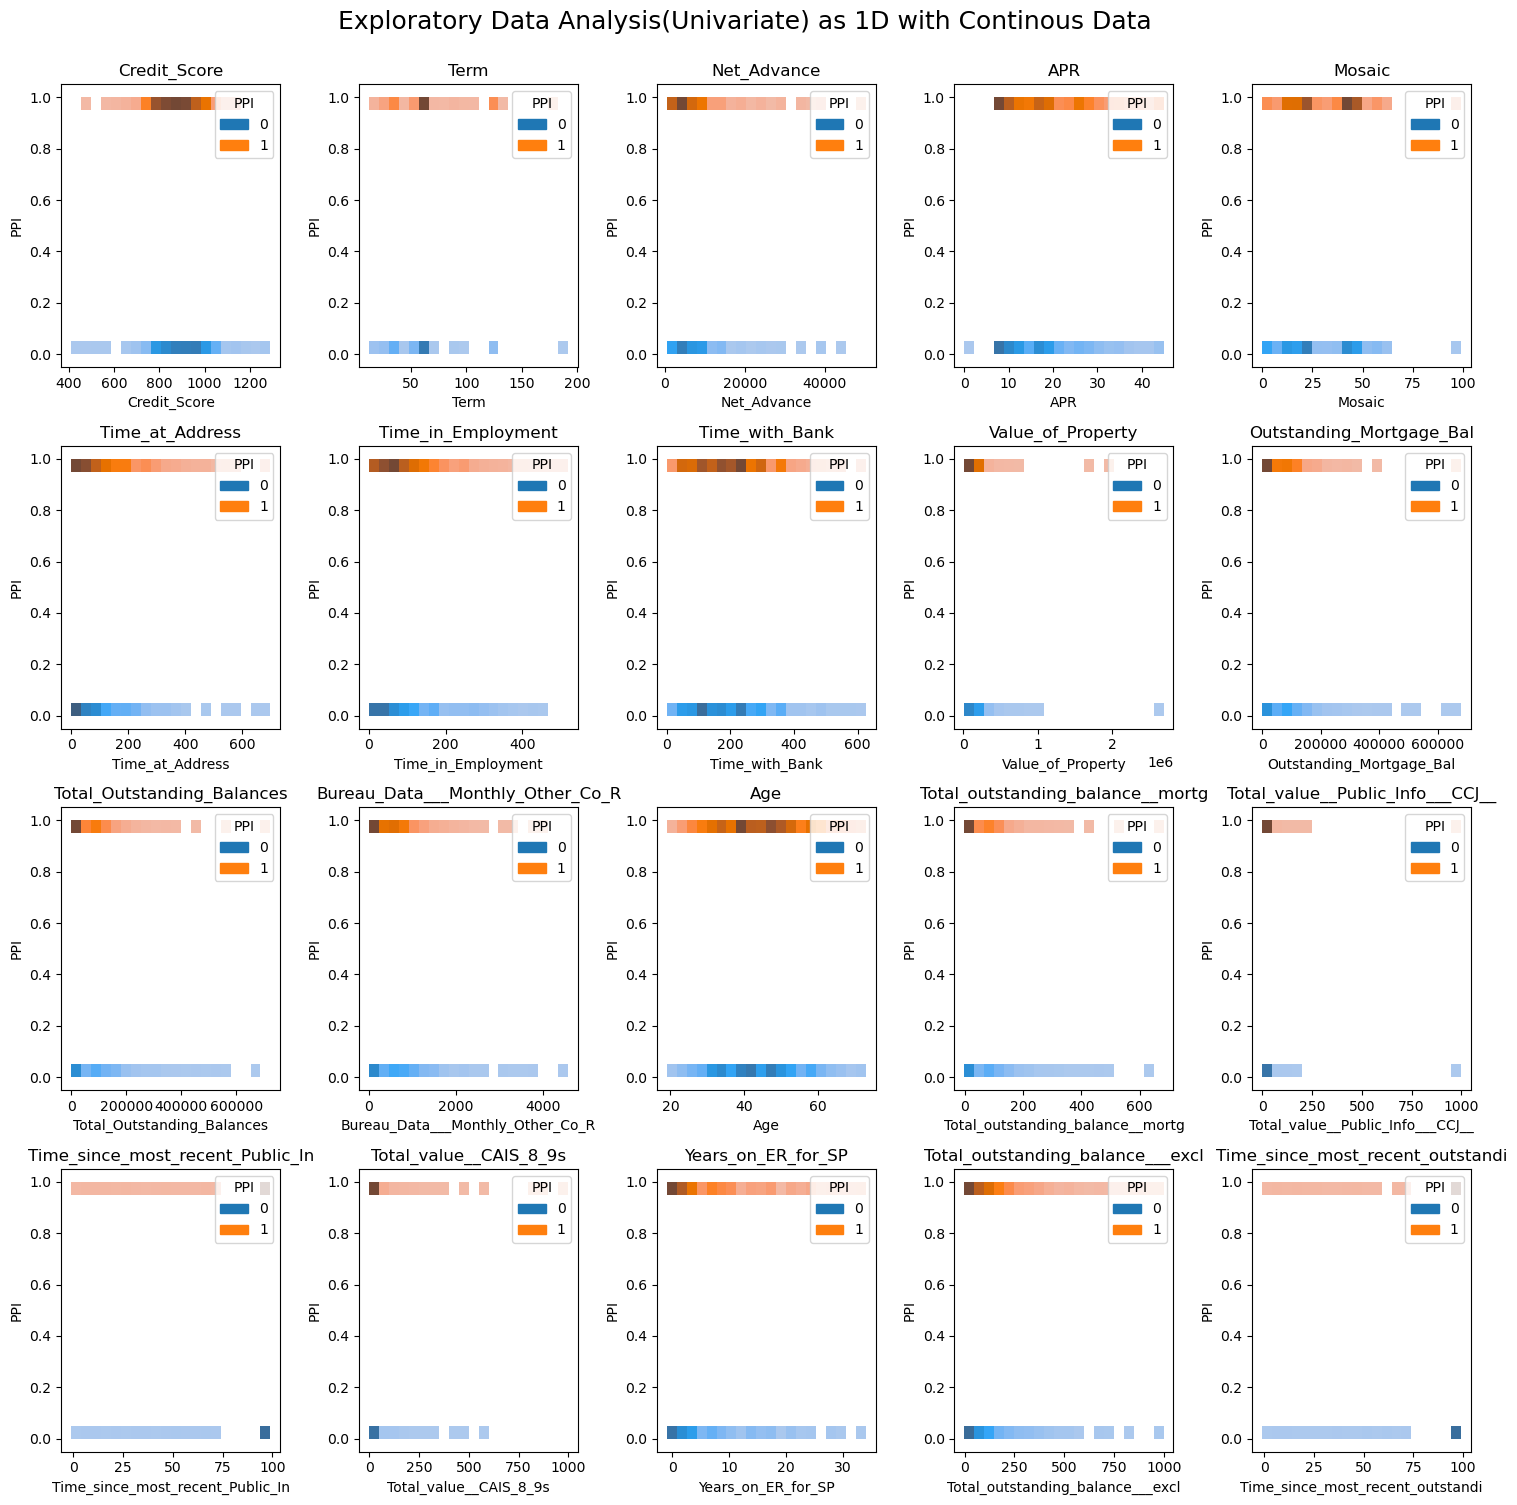

In [28]:
figure, ax = plt.subplots(4, 5, figsize=(15, 15))
figure.suptitle('Exploratory Data Analysis(Univariate) as 1D with Continous Data',x=0.5,y=1,size=18)
k=0
for i in range(4):
    for j in range(5):
        ax[i][j].set_title(measures[k])
        sns.histplot(sample,x=measures[k],y=sample["PPI"],hue="PPI",kde=True,ax=ax[i][j],bins=20)
        k+=1
plt.tight_layout()

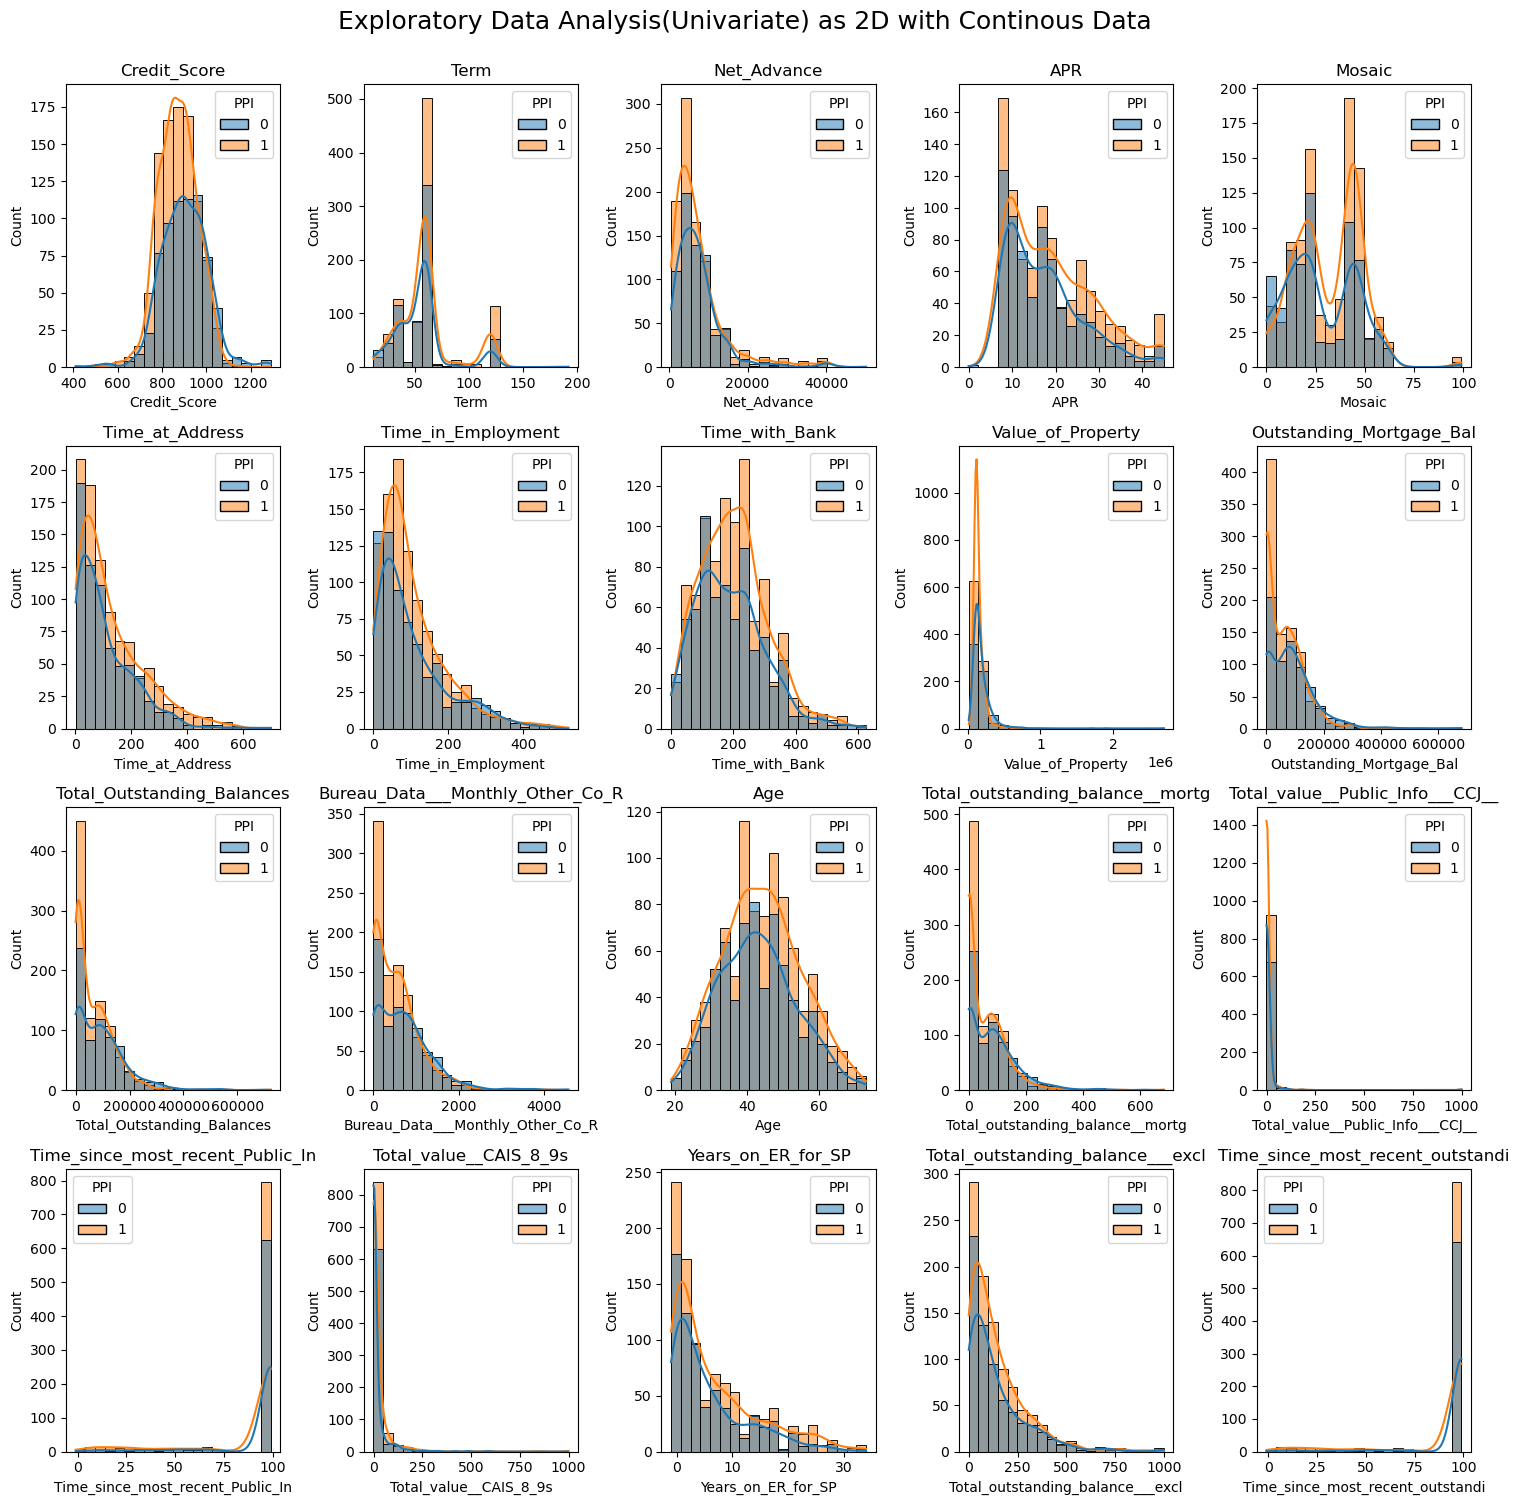

In [29]:
figure, ax = plt.subplots(4, 5, figsize=(15, 15))
figure.suptitle('Exploratory Data Analysis(Univariate) as 2D with Continous Data',x=0.5,y=1,size=18)
k=0
for i in range(4):
    for j in range(5):
        ax[i][j].set_title(measures[k])
        sns.histplot(sample,x=measures[k],hue="PPI",kde=True,ax=ax[i][j],bins=20)
        k+=1
plt.tight_layout()

In [30]:
#Sample
sample[measures].corrwith(sample["PPI"])

Credit_Score                       -0.149266
Term                                0.109657
Net_Advance                        -0.009381
APR                                 0.097382
Mosaic                              0.114249
Time_at_Address                     0.091886
Time_in_Employment                  0.002271
Time_with_Bank                      0.059890
Value_of_Property                  -0.139834
Outstanding_Mortgage_Bal           -0.180377
Total_Outstanding_Balances         -0.161212
Bureau_Data___Monthly_Other_Co_R   -0.147137
Age                                 0.053514
Total_outstanding_balance__mortg   -0.171007
Total_value__Public_Info___CCJ__   -0.003098
Time_since_most_recent_Public_In   -0.103428
Total_value__CAIS_8_9s              0.043065
Years_on_ER_for_SP                  0.055042
Total_outstanding_balance___excl   -0.003649
Time_since_most_recent_outstandi   -0.101073
dtype: float64

In [31]:
#Poplulation
c=data[measures].corrwith(data["PPI"])
c

Credit_Score                       -0.138538
Term                                0.113851
Net_Advance                        -0.004268
APR                                 0.062558
Mosaic                              0.137154
Time_at_Address                     0.092016
Time_in_Employment                 -0.019915
Time_with_Bank                      0.037623
Value_of_Property                  -0.147606
Outstanding_Mortgage_Bal           -0.121374
Total_Outstanding_Balances         -0.128756
Bureau_Data___Monthly_Other_Co_R   -0.118847
Age                                 0.071761
Total_outstanding_balance__mortg   -0.129190
Total_value__Public_Info___CCJ__    0.034813
Time_since_most_recent_Public_In   -0.103805
Total_value__CAIS_8_9s              0.054852
Years_on_ER_for_SP                  0.072578
Total_outstanding_balance___excl   -0.049733
Time_since_most_recent_outstandi   -0.096552
dtype: float64

Looks like the sample is able to represent the popluation\
Now I will pick only those meausures for further analysis that have a better correlation with the target variable.\
The threshhold will be less than -0.12 and more than 0.12

In [32]:
new_measures=[]
for i in measures:
    if c[i]<=-0.12 or c[i]>=0.12:
        new_measures.append(i)
new_measures

['Credit_Score',
 'Mosaic',
 'Value_of_Property',
 'Outstanding_Mortgage_Bal',
 'Total_Outstanding_Balances',
 'Total_outstanding_balance__mortg']

# Bivariate Analysis
Using the pair plot with the new measures.

As can be seen in the graphs and from the correlation values, not one feature has a clear and strong correlationship with the target variable. So i will try bivariate analysis next using pair plots.

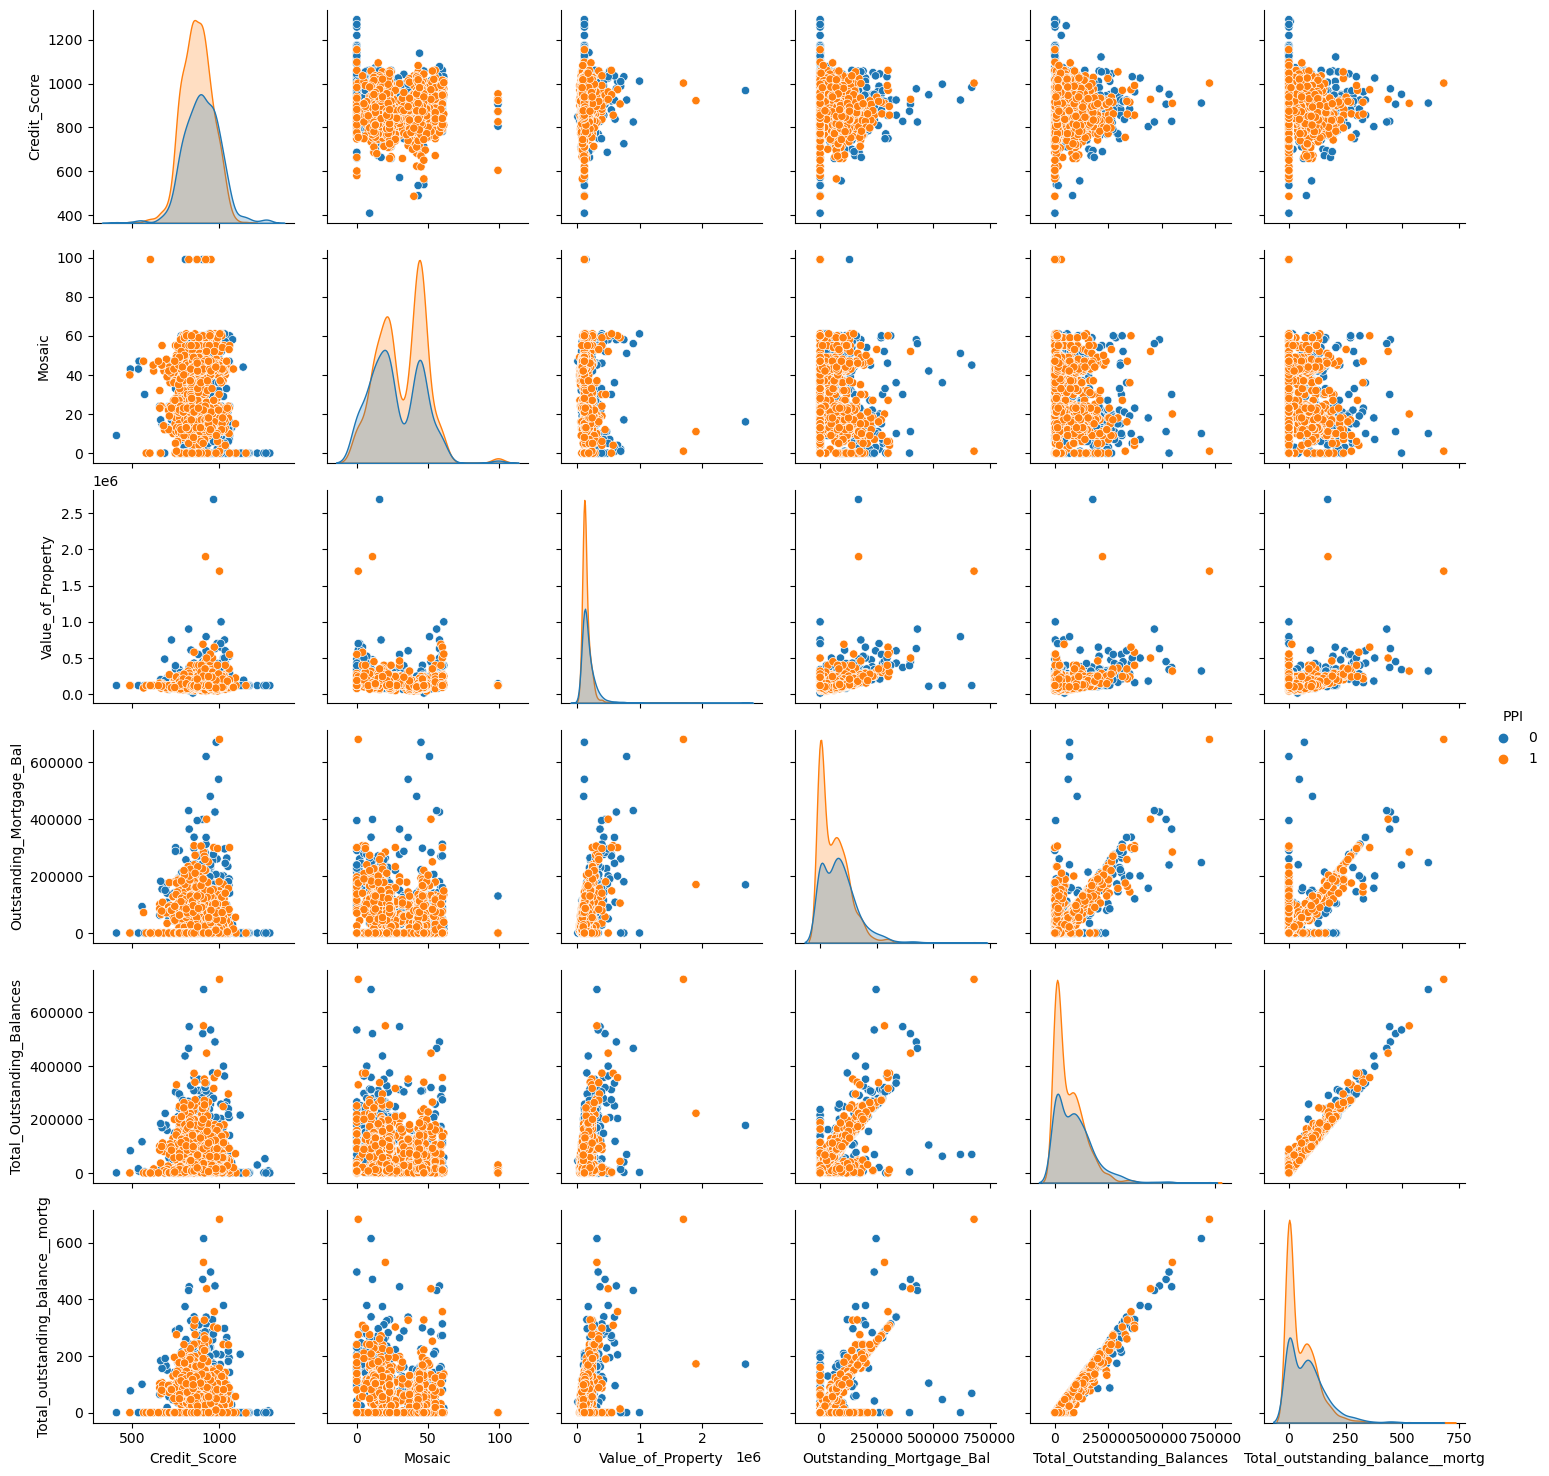

In [33]:
#Pair plot with the sample data
sns.pairplot(data=sample,vars=new_measures,hue="PPI")

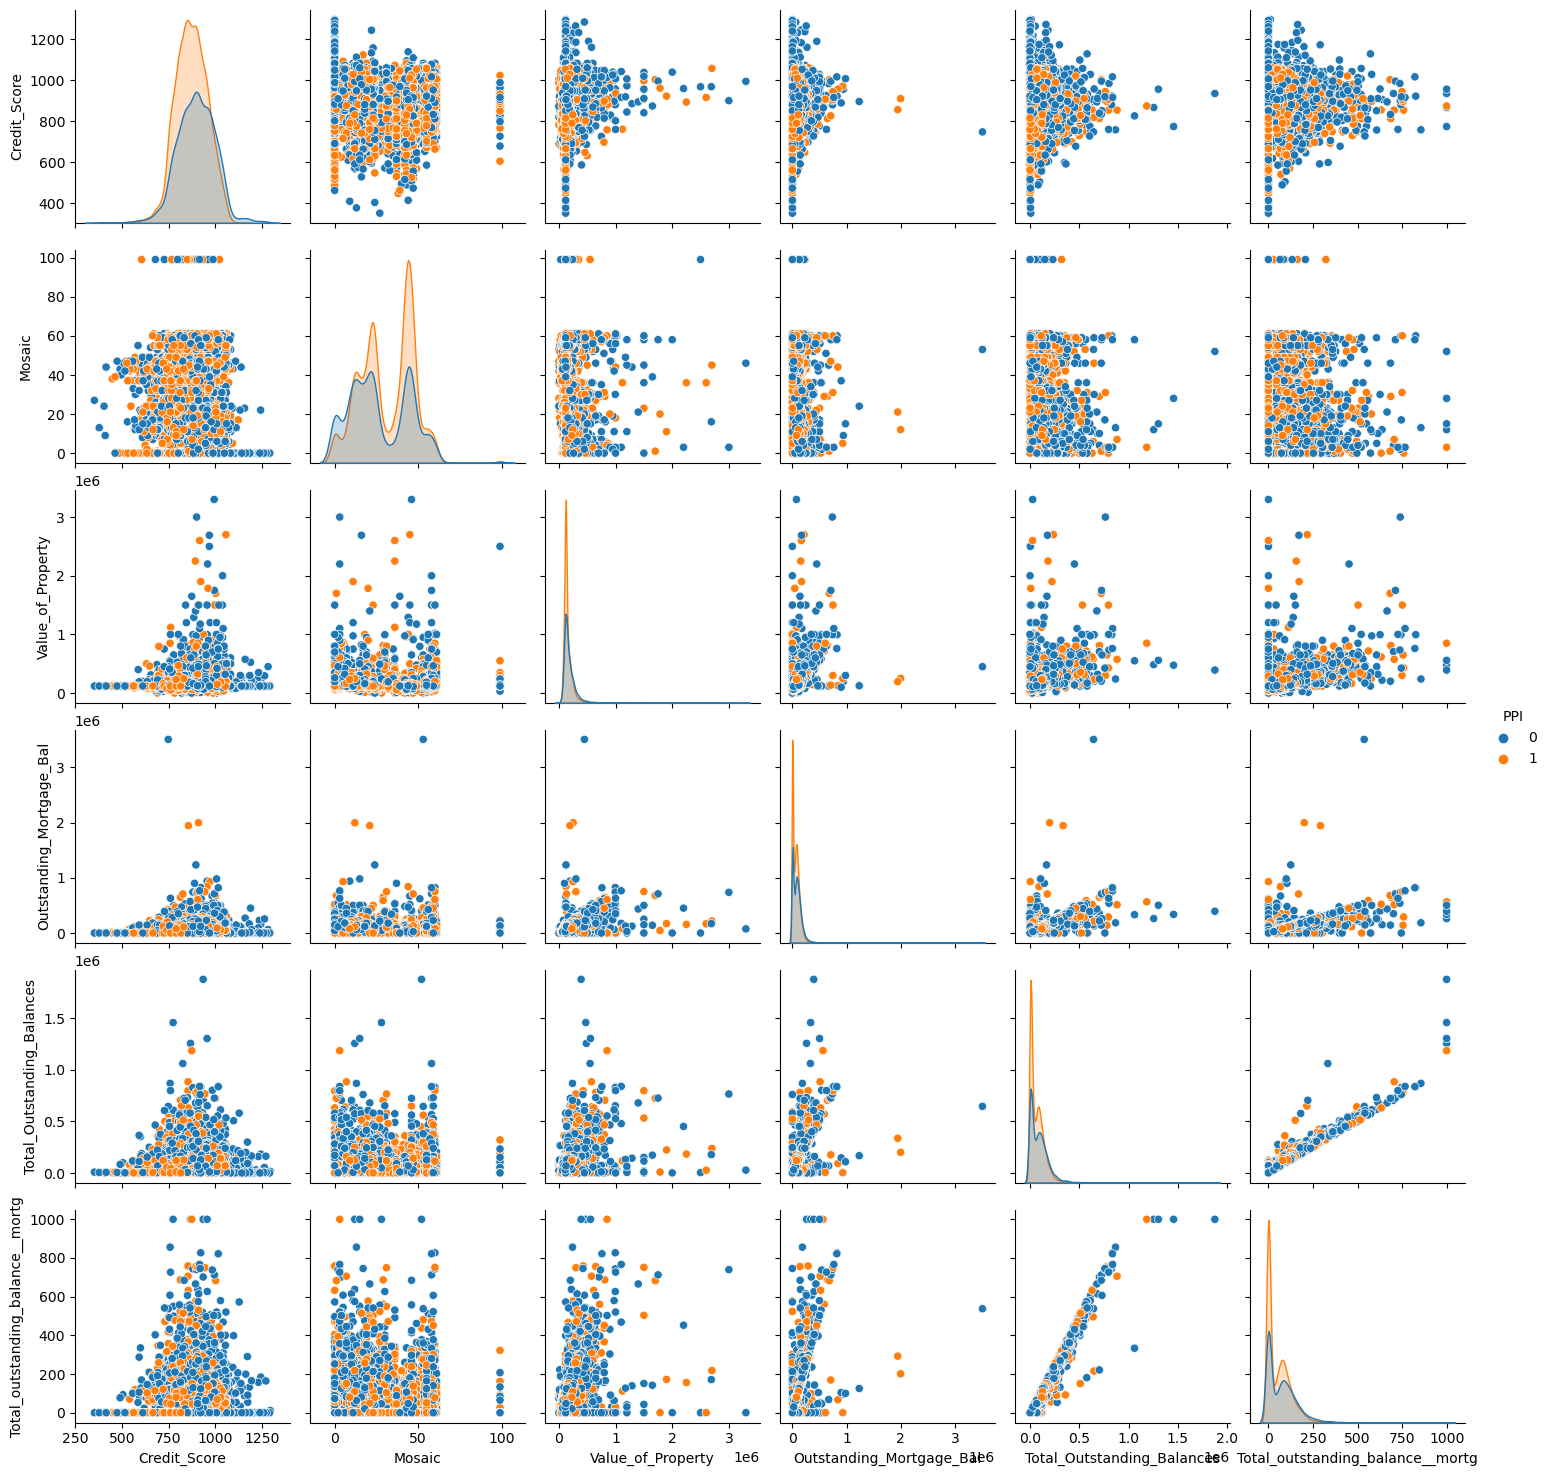

In [34]:
#Pair plot with the population dataset.
sns.pairplot(data,vars=new_measures,hue="PPI")

As seen from even the bivariate analysis, there are no clear clusters forming so PCA can't be done to create new pricipal components.

# Machine Learning Phase

# Phase 1- Dimensionality Reduction

Dimensionality reduction is the process of reducing the number of features (or dimensions) in a dataset while retaining as much information as possible.\
There are two main approaches to dimensionality reduction: feature selection and feature extraction.\


### Feature Selection:

Feature selection involves selecting a subset of the original features that are most relevant to the problem at hand. The goal is to reduce the dimensionality of the dataset while retaining the most important features.\
There are several methods for feature selection, including filter methods, wrapper methods, and embedded methods. Filter methods rank the features based on their relevance to the target variable, wrapper methods use the model performance as the criteria for selecting features, and embedded methods combine feature selection with the model training process.\
Already Done via features column.

### Feature Extraction

Feature extraction involves creating new features by combining or transforming the original features. The goal is to create a set of features that captures the essence of the original data in a lower-dimensional space.\
There are several methods for feature extraction, including principal component analysis (PCA), linear discriminant analysis (LDA), and t-distributed stochastic neighbor embedding (t-SNE). PCA is a popular technique that projects the original features onto a lower-dimensional space while preserving as much of the variance as possible.

In [35]:
# Importing libraries for machine learning, to train model and to split the data in test and train sub sections.
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### STEP : Data Processing


The next step in the project is to prepare the data for the modelling. The following preprocessing techniques are being used here:-
1. Convert the categorical features into dummies or doing categorical encoding.
2. Binning the numerical features.
3. Dropping the unnecessary columns like Ref. - Already done in the data analysis phase

Here I have created a user-defined function. We just need to pass the raw dataframe and we will get the preprocessed one.

In [36]:
def data_prep(df,dimensions,measures):
    
    df1=pd.get_dummies(data=df[dimensions],drop_first=True)
    df2=pd.DataFrame()
    for m in measures:
        bins=list(np.linspace(start=data[m].min(),stop=data[m].max(),num=5))
        df2[m] = pd.cut(data[m], bins)
        df2[m]= df2[m].cat.codes

    return pd.concat([df1,df2],axis=1)


X=data_prep(data,new_dimensions,new_measures)
X.head()

,Mosaic_Class,Income_Range,Total___Public_Info___CCJ____ban,Total___outstanding_CCJ_s,Total___of_accounts,Final_Grade_B,Final_Grade_C,Final_Grade_D,Final_Grade_E,Final_Grade_F,...,Final_Grade_X,Residential_Status_L,Residential_Status_R,Residential_Status_T,Credit_Score,Mosaic,Value_of_Property,Outstanding_Mortgage_Bal,Total_Outstanding_Balances,Total_outstanding_balance__mortg
0,8,6,1,1,6,0,0,0,0,0,...,0,0,0,0,2,1,0,0,0,0
1,3,2,0,0,8,0,0,0,0,0,...,0,0,0,0,2,0,0,0,0,0
2,3,5,2,1,7,0,0,0,0,0,...,1,0,0,0,3,0,0,0,0,0
3,8,6,0,0,9,1,0,0,0,0,...,0,0,1,0,2,1,0,-1,0,0
4,10,6,0,0,6,0,0,0,0,0,...,1,0,0,0,2,2,0,0,0,0


In [37]:
y=data["PPI"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [38]:
from imblearn.under_sampling import RandomUnderSampler

RUS = RandomUnderSampler(sampling_strategy=.8,random_state=3,)

X_train,y_train  = RUS.fit_resample(X,y)

#### Cross-Sell Prediction – Model training and prediction

Now, it is time to train a model and make predictions.  Here,  I have written a user-defined function for measuring the performance of the models.

For performance measurement, we will be using the accuracy score and F1 score. It is important to note here that for imbalanced classification problems, the F1 score is a more significant metric.

In [39]:
def performance_met(model,X_train,Y_train,X_test,Y_test):

    acc_train=metrics.accuracy_score(Y_train, model.predict(X_train))

    f1_train=metrics.f1_score(Y_train, model.predict(X_train))

    acc_test=metrics.accuracy_score(Y_test, model.predict(X_test))

    f1_test=metrics.f1_score(Y_test, model.predict(X_test))

    print("train score: accuracy:{} f1:{}".format(acc_train,f1_train))

    print("test score: accuracy:{} f1:{}".format(acc_test,f1_test))

## Logistic Regression

In [40]:
model = LogisticRegression(max_iter=500)
model.fit(X_train,y_train) 
performance_met(model,X_train,y_train,X_test,y_test)

train score: accuracy:0.6124951842814949 f1:0.6818828738601024
test score: accuracy:0.6216016275198817 f1:0.6948090692124106


## Decision Tree

In [41]:
model_DT=DecisionTreeClassifier(random_state=1) 
model_DT.fit(X_train,y_train)
performance_met(model_DT,X_train,y_train,X_test,y_test)

train score: accuracy:0.8007576730448183 f1:0.8110346507520857
test score: accuracy:0.7934159422970224 f1:0.8064460232195461


## Random forest

In [42]:
Forest= RandomForestClassifier(random_state=1) 
Forest.fit(X_train,y_train) 
performance_met(Forest,X_train,y_train,X_test,y_test)

train score: accuracy:0.8005650443046103 f1:0.8197748636416388
test score: accuracy:0.792491215091548 f1:0.8137450199203187


As seen from the evaluation of these models, decision tree and random forest are the better choice for this dataset after it was processed. The evaluation score the logistic regression can also be imporoved if the data before it was processed is passed into it. But it will still not be able to match the evaluation of the other two models.